# A smooth path to plot hydrogen atom via Monte Carlo method

## The Monte Carlo method - MCM

In [ ]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pyshtools.legendre import PLegendreA, PlmIndex

In [ ]:
r = 3       # radius
p = 8000    # number of pts
h = 0       # counter of pts inside the circle
i = 0       # counter of total pts

inside = []     # list of pts inside the circle
outside = []    # list of pts outside the circle

while i < p:
    x = (np.random.rand() * 2 - 1) * r  # random number in [-r, r]
    y = np.sqrt(r*r - x*x)
    w = (np.random.rand() * 2 - 1) * r  # random number in [-r, r]
    if w >= -y and w <= y:
        inside.append((x, w))
        h += 1
    else:
        outside.append((x, w))
    
    i += 1

S = (2 * r)**2 * h / p
S_true = np.pi * r * r
print(f"Estimated area = {S:.3f}, True area = {S_true:.3f}, Error = {abs(S - S_true) / S_true * 100:.3f} %.")

X_in = np.zeros((h, 1))
Y_in = np.zeros((h, 1))
for i, (x, y) in enumerate(inside):
    X_in[i], Y_in[i] = x, y

X_out = np.zeros((p - h, 1))
Y_out = np.zeros((p - h, 1))
for i, (x, y) in enumerate(outside):
    X_out[i], Y_out[i] = x, y

plt.figure(figsize=(12, 8))
x = np.linspace(-r, r, 100)
y = np.sqrt(r*r - x*x)
plt.plot(X_in, Y_in, 'b.', markersize=1)
plt.plot(X_out, Y_out, 'r.', markersize=1)
plt.plot(x, y, 'k-')
plt.plot(x, -y, 'k-')
plt.axis('square')
plt.xlim((-r-.5, r+.5))
plt.ylim((-r-.5, r+.5))
plt.show()

## The one-dimensional infinite potential well

In [ ]:
n = 3       # quantum number
L = 7       # length of infinite potential well
p = 8000    # number of pts

lst = []    # list to store the pts
i = 0       # counter
while i < p:
    x = np.random.rand() * L        # random number in [0, L]
    w = np.random.rand() * 2 / L    # random number in [0, 2/L]
    psi2 = 2 / L * np.sin(n * np.pi / L * x) ** 2
    if w <= psi2:
        lst.append((x, w))
        i += 1

X = np.zeros((p, 1))
Y = np.zeros((p, 1))
for i, (x, y) in enumerate(lst):
    X[i], Y[i] = x, y

x = np.linspace(0, L, 100)
y = 2 / L * np.sin(n * np.pi / L * x) ** 2

plt.figure(figsize=(12, 8))
plt.plot(X, Y * 100, 'b.', markersize=1)
plt.plot(x, y * 100, 'k-', label='$|\psi(x)|^2$')
plt.xlabel('x')
plt.ylabel('$w \\times 10^2$')
plt.legend()
plt.ylim((0, 35))
plt.show()

## The two-dimensional infinite potential well

In [ ]:
nx = 3      # quantum number
ny = 2      # quantum number
Lx = 25     # length of infinite potential well
Ly = 30     # length of infinite potential well
p = 8000    # number of pts

lst = []    # list to store the pts
i = 0       # counter
while i < p:
    x = np.random.rand() * Lx   # random number in [0, Lx]
    y = np.random.rand() * Ly   # random number in [0, Ly]
    w = np.random.rand() * 4 / Lx / Ly  # random number in [0, 4/(Lx*Ly)]
    psi2 = 4 / (Lx*Ly) * np.sin(nx * np.pi / Lx * x)**2 * np.sin(ny * np.pi / Ly * y)**2
    if w <= psi2:
        lst.append((x, y, w))
        i += 1

X = np.zeros((p, 1))
Y = np.zeros((p, 1))
W = np.zeros((p, 1))
for i, (x, y, w) in enumerate(lst):
    X[i], Y[i], W[i] = x, y, w

x, y = np.meshgrid(np.linspace(0, Lx, 100), np.linspace(0, Ly, 100))
w = 4 / (Lx*Ly) * np.sin(nx * np.pi / Lx * x)**2 * np.sin(ny * np.pi / Ly * y)**2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect((1, 1, 0.4))

ax.scatter(X, Y, W*1000, s=1)
ax.plot_wireframe(x, y, w*1000, rcount=20, ccount=20, color='b', linewidth=.3, label='$|\psi(x,y)|^2$')
ax.set_zlim((0, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$w \\times 10^3$')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.grid(None)
ax.legend()
ax.view_init(30, -60)
plt.show()

## The three-dimensional infinite potential well

In [ ]:
nx = 2      # quantum number
ny = 1      # quantum number
nz = 4      # quantum number
Lx = 90     # length of infinite potential well
Ly = 30     # length of infinite potential well
Lz = 60     # length of infinite potential well
p = 50000   # number of pts

lst = []    # list to store the pts
i = 0       # counter
while i < p:
    x = np.random.rand() * Lx   # random number in [0, Lx]
    y = np.random.rand() * Ly   # random number in [0, Ly]
    z = np.random.rand() * Lz   # random number in [0, Lz]
    w = np.random.rand() * 8 / Lx / Ly / Lz # random number in [0, 4/(Lx*Ly)]
    psi2 = 8 / (Lx*Ly*Lz) * np.sin(nx * np.pi / Lx * x)**2 * \
        np.sin(ny * np.pi / Ly * y)**2 * np.sin(nz * np.pi / Lz * z)**2
    if w <= psi2:
        lst.append((x, y, z))
        i += 1

X = np.zeros((p, 1))
Y = np.zeros((p, 1))
Z = np.zeros((p, 1))
for i, (x, y, z) in enumerate(lst):
    X[i], Y[i], Z[i] = x, y, z

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, Z, s=1)
ax.set_zlim((0, Lz))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.grid(None)
ax.view_init(10, -75)
plt.show()

## The hydrogen atom

In [ ]:
# helper function

a0 = 0.52917721067  # Bohr radius, in Ångstrom


def rAbs(r):
    return np.sqrt(r[0] ** 2 + r[1] ** 2 + r[2] ** 2)


def thetaVal(r):
    return np.arccos(r[2] / np.sqrt(np.sum(r ** 2)))


def fillVector(dx, dy, dz):
    r = np.random.rand(3)
    r[0] = dx * (r[0] - 0.5)
    r[1] = dy * (r[1] - 0.5)
    r[2] = dz * (r[2] - 0.5)
    return r


def radDF(n, l, r):
    """
    radial part
    :param n: radial quantum number
    :param l: azimuthal quantum number
    :param r: radius
    :return: result of the radial part
    """
    Z = 1  # atomic number, 1 for hydrogen atom
    r0 = 2.0 * Z / (n * a0) * r
    s = 0  # sum
    terms = np.zeros(6)

    for k in range(0, n - l):
        # from 0 to n-l-1
        terms[0] = (-1.0) ** (k + 1)
        terms[1] = factorial(n + l) ** 2.0
        terms[2] = factorial(n - l - 1 - k)
        terms[3] = factorial(2 * l + 1 + k)
        terms[4] = factorial(k)
        terms[5] = r0 ** k
        s += terms[0] * terms[1] / (terms[2] * terms[3] * terms[4]) * terms[5]

    terms[:] = 0.0
    terms[0] = (2.0 * Z / (n * a0)) ** 3.0
    terms[1] = factorial(n - l - 1)
    terms[2] = 2.0 * n
    terms[3] = factorial(n + l) ** 3.0

    normTermSquared = terms[0] * terms[1] / (terms[2] * terms[3])

    radialTerm = np.exp(-r0 / 2.0) * (r0 ** l)

    radDF = (s * radialTerm) ** 2.0
    radDF = radDF * normTermSquared
    return radDF


def angDF(l, m, theta):
    """
    angular part
    :param l: azimuthal quantum number
    :param m: magnetic quantum number
    :param theta: polar angle
    :return: result of the angular part
    """
    z = np.cos(theta)
    p = PLegendreA(l, z)
    arrayIndex = PlmIndex(l, m)

    normRoot = 1.0 * factorial(l - m) / factorial(l + m)
    normRoot = normRoot * (2.0 * l + 1.0) / (4.0 * np.pi)

    angDF = normRoot * p[arrayIndex] ** 2.0

    return angDF


def wave2max(coordRange, nlm, rDiv, thetaDiv):
    """
    upper limit of the wave function squared
    :param coordRange: box dimension
    :param nlm:        n, l, and m
    :param rDiv:       number of division in r
    :param thetaDiv:   number of division in theta
    :return: the upper limit of the waver function squared
    """

    rMax = np.sqrt(np.sum(coordRange ** 2))

    dr = rMax / (1.0 * rDiv)
    dTheta = np.pi / (1.0 * thetaDiv)
    maxValue = 0.0

    curr = np.zeros(2)
    for i in range(rDiv):
        r = i * dr
        for j in range(thetaDiv):
            theta = j * dTheta
            curr[0] = angDF(nlm[1], nlm[2], theta)
            curr[1] = radDF(nlm[0], nlm[1], r)
            calc = curr[0] * curr[1]

            if calc > maxValue:
                maxValue = calc

    return maxValue

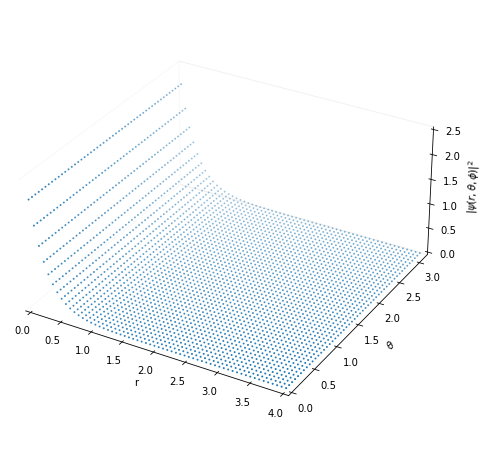

In [36]:
n, l, m = 1, 0, 0   # radial, azimuthal, and magnetic quantum number

rL = 4
R = np.linspace(0, rL, 60)               # radius
Theta = np.linspace(0, np.pi, 50)       # polar angles
PSI2 = np.zeros((Theta.size, R.size)) # wavefunction squared

for i, theta in enumerate(Theta):
    for j, r in enumerate(R):
        PSI2[i, j] = radDF(n, l, r) * angDF(l, m, theta)

R, Theta = np.meshgrid(R, Theta)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=(1,1,0.5))

ax.scatter(R, Theta, PSI2, s=1)
ax.set_xlim((0, rL))
ax.set_ylim((0, np.pi))
ax.set_zlim((0, 2.5))
ax.set_xlabel('r')
ax.set_ylabel('$\\theta$')
ax.set_zlabel('$|\psi(r,\\theta,\phi)|^2$')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
plt.show()

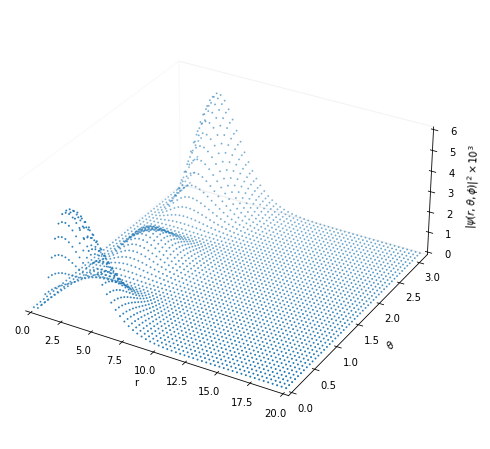

In [37]:
n, l, m = 3, 2, 0   # radial, azimuthal, and magnetic quantum number

rL = 20
R = np.linspace(0, rL, 60)               # radius
Theta = np.linspace(0, np.pi, 50)       # polar angles
PSI2 = np.zeros((Theta.size, R.size))  # wavefunction squared

for i, theta in enumerate(Theta):
    for j, r in enumerate(R):
        PSI2[i, j] = radDF(n, l, r) * angDF(l, m, theta)

R, Theta = np.meshgrid(R, Theta)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(R, Theta, PSI2*1000, s=1)
ax.set_box_aspect(aspect=(1,1,0.5))

ax.set_xlim((0, rL))
ax.set_ylim((0, np.pi))
ax.set_zlim((0, 6))
ax.set_xlabel('r')
ax.set_ylabel('$\\theta$')
ax.set_zlabel('$|\psi(r,\\theta,\phi)|^2\\times 10^3$')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
plt.show()

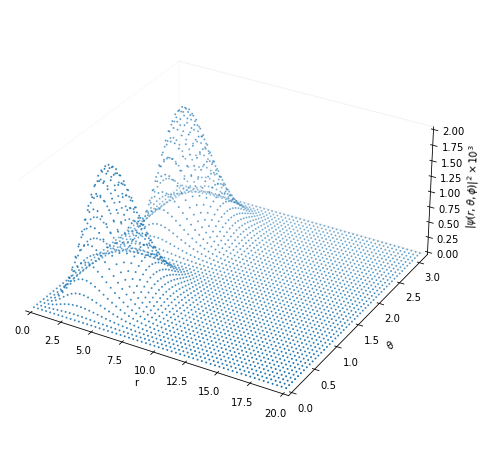

In [38]:
n, l, m = 3, 2, 1   # radial, azimuthal, and magnetic quantum number

rL = 20
R = np.linspace(0, rL, 60)               # radius
Theta = np.linspace(0, np.pi, 50)       # polar angles
PSI2 = np.zeros((Theta.size, R.size))  # wavefunction squared

for i, theta in enumerate(Theta):
    for j, r in enumerate(R):
        PSI2[i, j] = radDF(n, l, r) * angDF(l, m, theta)

R, Theta = np.meshgrid(R, Theta)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=(1,1,0.5))

ax.scatter(R, Theta, PSI2*1000, s=1)
ax.set_xlim((0, rL))
ax.set_ylim((0, np.pi))
ax.set_zlim((0, 2))
ax.set_xlabel('r')
ax.set_ylabel('$\\theta$')
ax.set_zlabel('$|\psi(r,\\theta,\phi)|^2\\times 10^3$')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
plt.show()

100%|██████████| 15000/15000 [12:45<00:00, 19.59it/s]


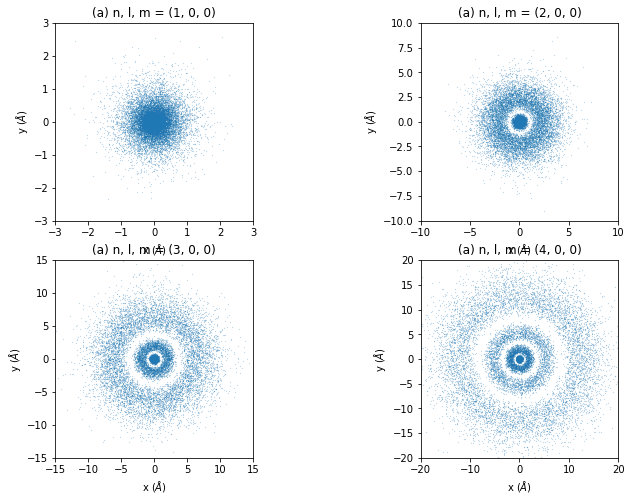

In [48]:
icr = 1.05  # 5% increment
points = 15000  # total number of points

n, l, m = 1, 0, 0  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 6.0, 6.0, 0.0  # box dimension
dr, dTheta = 0.15, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

fig = plt.figure(figsize=(12, 8))
fig.tight_layout()
ax = fig.add_subplot(221)

ax.scatter(X, Y, s=0.01)
ax.axis('square')
ax.set_xlim((-dx/2, dx/2))
ax.set_ylim((-dy/2, dy/2))
ax.set_xlabel('x ($\AA$)')
ax.set_ylabel('y ($\AA$)')
ax.set_title('(a) n, l, m = (1, 0, 0)')

#====================================================================
n, l, m = 2, 0, 0  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 20.0, 20.0, 0.0  # box dimension
dr, dTheta = 0.45, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

ax = fig.add_subplot(222)

ax.scatter(X, Y, s=0.01)
ax.axis('square')
ax.set_xlim((-dx/2, dx/2))
ax.set_ylim((-dy/2, dy/2))
ax.set_xlabel('x ($\AA$)')
ax.set_ylabel('y ($\AA$)')
ax.set_title('(b) n, l, m = (2, 0, 0)')

#=====================================================================
n, l, m = 3, 0, 0  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 30.0, 30.0, 0.0  # box dimension
dr, dTheta = 0.65, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

ax = fig.add_subplot(223)

ax.scatter(X, Y, s=0.01)
ax.axis('square')
ax.set_xlim((-dx/2, dx/2))
ax.set_ylim((-dy/2, dy/2))
ax.set_xlabel('x ($\AA$)')
ax.set_ylabel('y ($\AA$)')
ax.set_title('(c) n, l, m = (3, 0, 0)')

#=====================================================================
n, l, m = 4, 0, 0  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 40.0, 40.0, 0.0  # box dimension
dr, dTheta = 0.9, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

ax = fig.add_subplot(224)

ax.scatter(X, Y, s=0.01)
ax.axis('square')
ax.set_xlim((-dx/2, dx/2))
ax.set_ylim((-dy/2, dy/2))
ax.set_xlabel('x ($\AA$)')
ax.set_ylabel('y ($\AA$)')
ax.set_title('(d) n, l, m = (4, 0, 0)')

plt.show()

100%|██████████| 15000/15000 [00:12<00:00, 1219.22it/s]


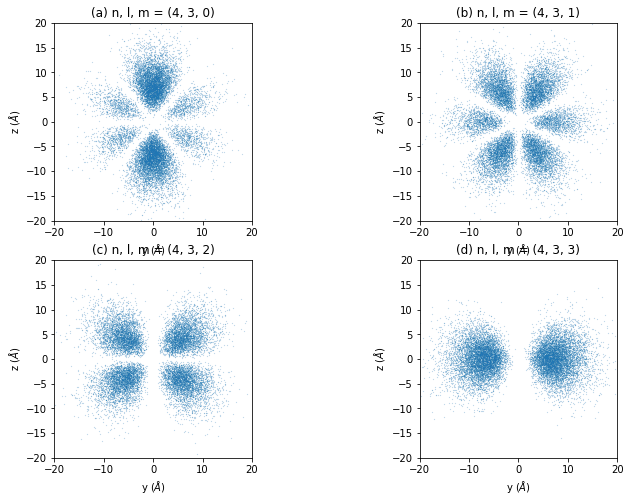

In [49]:
icr = 1.05  # 5% increment
points = 15000  # total number of points

n, l, m = 4, 3, 0  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 0.0, 40.0, 40.0  # box dimension
dr, dTheta = 0.9, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

fig = plt.figure(figsize=(12, 8))
fig.tight_layout()
ax = fig.add_subplot(221)

ax.scatter(Y, Z, s=0.01)
ax.axis('square')
ax.set_xlim((-dy/2, dy/2))
ax.set_ylim((-dz/2, dz/2))
ax.set_xlabel('y ($\AA$)')
ax.set_ylabel('z ($\AA$)')
ax.set_title('(a) n, l, m = (4, 3, 0)')

#====================================================================
n, l, m = 4, 3, 1  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 0.0, 40.0, 40.0  # box dimension
dr, dTheta = 0.9, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

ax = fig.add_subplot(222)

ax.scatter(Y, Z, s=0.01)
ax.axis('square')
ax.set_xlim((-dy/2, dy/2))
ax.set_ylim((-dz/2, dz/2))
ax.set_xlabel('y ($\AA$)')
ax.set_ylabel('z ($\AA$)')
ax.set_title('(b) n, l, m = (4, 3, 1)')

#=====================================================================
n, l, m = 4, 3, 2  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 0.0, 40.0, 40.0  # box dimension
dr, dTheta = 0.9, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

ax = fig.add_subplot(223)

ax.scatter(Y, Z, s=0.01)
ax.axis('square')
ax.set_xlim((-dy/2, dy/2))
ax.set_ylim((-dz/2, dz/2))
ax.set_xlabel('y ($\AA$)')
ax.set_ylabel('z ($\AA$)')
ax.set_title('(c) n, l, m = (4, 3, 2)')

#=====================================================================
n, l, m = 4, 3, 3  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 0.0, 40.0, 40.0  # box dimension
dr, dTheta = 0.9, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

ax = fig.add_subplot(224)

ax.scatter(Y, Z, s=0.01)
ax.axis('square')
ax.set_xlim((-dy/2, dy/2))
ax.set_ylim((-dz/2, dz/2))
ax.set_xlabel('y ($\AA$)')
ax.set_ylabel('z ($\AA$)')
ax.set_title('(d) n, l, m = (4, 3, 3)')

plt.show()

100%|██████████| 15000/15000 [00:12<00:00, 1159.21it/s]


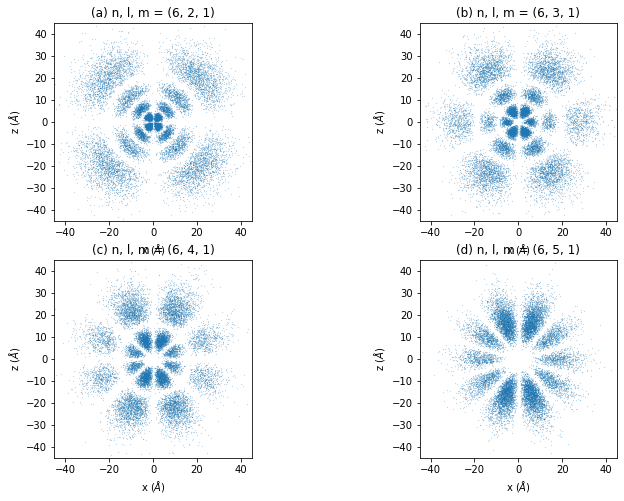

In [50]:
icr = 1.05  # 5% increment
points = 15000  # total number of points

n, l, m = 6, 2, 1  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 90.0, 0.0, 90.0  # box dimension
dr, dTheta = 2.0, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

fig = plt.figure(figsize=(12, 8))
fig.tight_layout()
ax = fig.add_subplot(221)

ax.scatter(X, Z, s=0.01)
ax.axis('square')
ax.set_xlim((-dx/2, dx/2))
ax.set_ylim((-dz/2, dz/2))
ax.set_xlabel('x ($\AA$)')
ax.set_ylabel('z ($\AA$)')
ax.set_title('(a) n, l, m = (6, 2, 1)')

#====================================================================
n, l, m = 6, 3, 1  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 90.0, 0.0, 90.0  # box dimension
dr, dTheta = 2.0, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

ax = fig.add_subplot(222)

ax.scatter(X, Z, s=0.01)
ax.axis('square')
ax.set_xlim((-dx/2, dx/2))
ax.set_ylim((-dz/2, dz/2))
ax.set_xlabel('x ($\AA$)')
ax.set_ylabel('z ($\AA$)')
ax.set_title('(b) n, l, m = (6, 3, 1)')

#=====================================================================
n, l, m = 6, 4, 1  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 90.0, 0.0, 90.0  # box dimension
dr, dTheta = 2.0, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

ax = fig.add_subplot(223)

ax.scatter(X, Z, s=0.01)
ax.axis('square')
ax.set_xlim((-dx/2, dx/2))
ax.set_ylim((-dz/2, dz/2))
ax.set_xlabel('x ($\AA$)')
ax.set_ylabel('z ($\AA$)')
ax.set_title('(c) n, l, m = (6, 4, 1)')

#=====================================================================
n, l, m = 6, 5, 1  # radial, azimuthal, and magnetic quantum numbers
dx, dy, dz = 90.0, 0.0, 90.0  # box dimension
dr, dTheta = 2.0, 0.04  # incremental spacing for r and theta

rDiv = int(rAbs(np.array([dx, dy, dz])) / dr) + \
    1  # number of divisions in r
thetaDiv = int(2.0 * np.pi / dTheta) + 1  # number of divisions in theta
maxVal = wave2max(np.array([dx, dy, dz]), np.array([n, l, m]), rDiv, thetaDiv)

i = 0
X = np.zeros(points)
Y = np.zeros(points)
Z = np.zeros(points)
W = np.zeros(points)
pBar = tqdm(total=points)
while i < points:
    w = np.random.rand() * maxVal * icr
    rVector = fillVector(dx, dy, dz)
    r = rAbs(rVector)
    theta = thetaVal(rVector)
    psi2 = radDF(n, l, r) * angDF(l, m, theta)
    if w < psi2:
        X[i], Y[i], Z[i], W[i] = rVector[0], rVector[1], rVector[2], w
        i += 1
        pBar.update(1)
pBar.close()

ax = fig.add_subplot(224)

ax.scatter(X, Z, s=0.01)
ax.axis('square')
ax.set_xlim((-dx/2, dx/2))
ax.set_ylim((-dz/2, dz/2))
ax.set_xlabel('x ($\AA$)')
ax.set_ylabel('z ($\AA$)')
ax.set_title('(d) n, l, m = (6, 5, 1)')

plt.show()